# Pretrage grafova

1. Definisanje grafa
2. Slepe pretrage
3. Rekonstruisanje putanje

In [4]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

# Zadatak 1

Definisati graf čiji čvorovi predstavljaju gradove a grane postojeće puteve između gradova. Iscrtati definisani graf.

In [ ]:
graf = (Gradovi, Putevi)
Gradovi = {"Novi Sad", "Beograd", "Subotica"}
putevi = [("Novi Sad", "Beograd"), ("Beograd", "Subotica"), ("Novi Sad", "Subotica")]

In [ ]:
# preko matrica
[[0,1,0],
[1,0,0],
[1.0,0]]

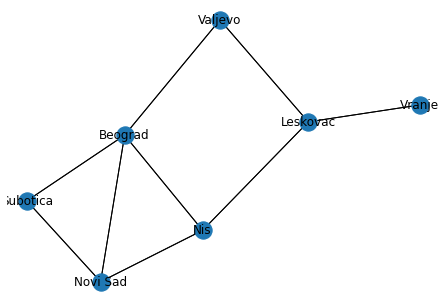

In [47]:
graf = {
    "Beograd": ["Novi Sad", "Nis", "Subotica", "Valjevo"],
    "Novi Sad": ["Beograd", "Subotica", "Nis"],
    "Subotica": ["Beograd", "Novi Sad"],
    "Nis": ["Beograd", "Novi Sad", "Leskovac"],
    "Valjevo": ["Beograd", "Leskovac"],
    "Leskovac": ["Valjevo", "Nis", "Vranje"],
    "Vranje": ["Leskovac"]
}

nx_graf = nx.from_dict_of_lists(graf, create_using=nx.DiGraph)
layout = nx.spring_layout(nx_graf)
nx.draw(nx_graf, pos=layout, with_labels= True, arrows = False)

# Zadatak 2

Napisati funkciju bfs koja vrši pretragu prvi u širinu.

In [17]:
def bfs(graf, pocetni_cvor, ciljni_cvor):
    za_pretragu = [pocetni_cvor]
    poseceni = set(za_pretragu)
    while len(za_pretragu) > 0:
        trenutni = za_pretragu.pop(0)     # uzimamo prvi u listi da vidimo da li je ciljni
        print(za_pretragu)
        if trenutni == ciljni_cvor:
            return True
        for cvor in graf[trenutni]:
            if cvor not in poseceni:
                za_pretragu.append(cvor)
                poseceni.add(cvor)
        #za_pretragu.extend(graf[trenutni]) # prosirujemo listu sa decom
    return False

rezultat = bfs(graf, "Novi Sad", "Lo")
print(rezultat)

[]
['Subotica', 'Nis']
['Nis', 'Valjevo']
['Valjevo']
['Leskovac']
[]
[]
False


# Zadatak 3

Prepraviti rešenje prethodnog zadatka tako da se kao rezultat dobija rekonstruisana putanja do pronađenog čvora ili None ukoliko je pretraga neuspešna.

In [48]:
# da bi zanli tacno put kojim smo isli
def napravi_putanju(istorija, zavrsni_cvor):
    trenutni = None
    for i in istorija:
        if i[1]== zavrsni_cvor:
            trenutni = i
    putanja = [trenutni]
    while trenutni[0] is not None:
        for i in istorija:
            if i[1] == trenutni[0]:
                trenutni = i
                putanja.insert(0, i)
    return putanja
            
def bfs(graf, pocetni_cvor, ciljni_cvor):
    za_pretragu = [pocetni_cvor]
    poseceni = set(za_pretragu)
    istorija =[(None, pocetni_cvor)]       # u istoriju stavljamo None zato sto na pocetku nismo dosli niotkuda
    while len(za_pretragu) > 0:
        trenutni = za_pretragu.pop(0)     
        print(za_pretragu)
        if trenutni == ciljni_cvor:
            return napravi_putanju(istorija, ciljni_cvor)  # vise ne vraca True
        for cvor in graf[trenutni]:
            if cvor not in poseceni:
                za_pretragu.append(cvor)
                poseceni.add(cvor)
                istorija.append((trenutni, cvor))   # postavljamo novu istoriju
    return False

rezultat = bfs(graf, "Vranje", "Subotica")
print(rezultat)

[]
[]
['Nis']
['Beograd']
['Novi Sad']
['Subotica']
[]
[(None, 'Vranje'), ('Vranje', 'Leskovac'), ('Leskovac', 'Valjevo'), ('Valjevo', 'Beograd'), ('Beograd', 'Subotica')]


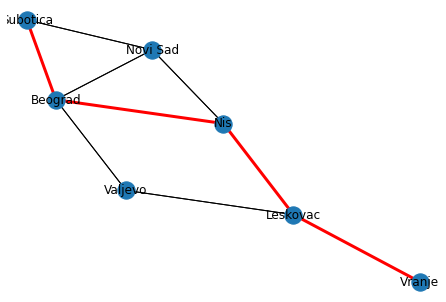

In [33]:
nx.draw(nx_graf, pos=layout, with_labels= True, arrows= False)
nx.draw_networkx_edges(nx_graf, pos=layout, edgelist=rezultat[1:], arrows = False, edge_color='r', width = 3)

# Zadatak 4

Napisati funkciju dfs koja radi pretragu prvi u dubinu i vraća putanju do pronađenog cilja ili None u slučaju da cilj nije pronađen.

[[None, 'Vranje'], ['Vranje', 'Leskovac'], ['Leskovac', 'Valjevo'], ['Valjevo', 'Beograd'], ['Beograd', 'Novi Sad'], ['Novi Sad', 'Nis']]


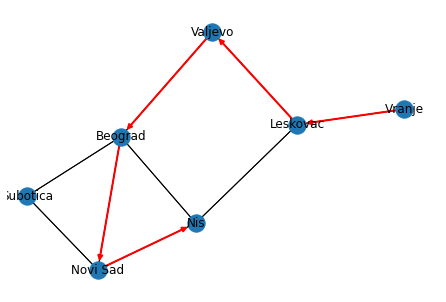

In [49]:
def dfs(graf, pocetni_cvor, ciljni_cvor):
    za_pretragu = [pocetni_cvor]
    poseceni = set(za_pretragu)
    istorija = [[None, pocetni_cvor]]
    trenutni = None
    while len(za_pretragu) > 0:
        trenutni = za_pretragu.pop()
        poseceni.add(trenutni)
        if trenutni == ciljni_cvor:
            return napravi_putanju(istorija, ciljni_cvor)
        for cvor in reversed(graf[trenutni]):
            if cvor not in poseceni:
                za_pretragu.append(cvor)
                istorija.append([trenutni, cvor])
    return None

rezultat = dfs(graf, "Vranje", "Nis")
print(rezultat)
nx.draw(nx_graf, pos=layout, with_labels=True, arrows=False)
nx.draw_networkx_edges(nx_graf, edgelist=rezultat[1:], pos=layout, edge_color='r', width=2)